In [11]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from vnstock import Vnstock, Quote
os.makedirs("../data/raw", exist_ok=True)


In [12]:
ticker = "VNM"
start_date = "2023-01-01"
end_date = "2025-01-01"

# Cách 1: Dùng Vnstock()
stock = Vnstock().stock(symbol=ticker, source="VCI")
df_raw = stock.quote.history(start=start_date, end=end_date, interval="1D")

# Cách 2: Hoặc dùng Quote()
# quote = Quote(symbol=ticker, source="VCI")
# df_raw = quote.history(start=start_date, end=end_date, interval="1D")

df_raw.head()


,time,open,high,low,close,volume
0,2023-01-03,67.18,68.94,66.92,68.94,1496887
1,2023-01-04,69.12,69.64,69.03,69.64,1090697
2,2023-01-05,69.64,71.49,69.38,71.31,2471156
3,2023-01-06,71.14,71.31,69.91,70.08,1270661
4,2023-01-09,70.17,70.87,69.91,70.87,949900


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   time    499 non-null    datetime64[ns]
 1   open    499 non-null    float64       
 2   high    499 non-null    float64       
 3   low     499 non-null    float64       
 4   close   499 non-null    float64       
 5   volume  499 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 23.5 KB
None
                                time        open        high         low  \
count                            499  499.000000  499.000000  499.000000   
mean   2024-01-04 16:09:37.154308608   64.157495   64.646834   63.637094   
min              2023-01-03 00:00:00   57.610000   57.880000   57.520000   
25%              2023-07-06 12:00:00   61.710000   62.100000   61.275000   
50%              2024-01-02 00:00:00   63.340000   63.760000   62.790000   
75%          

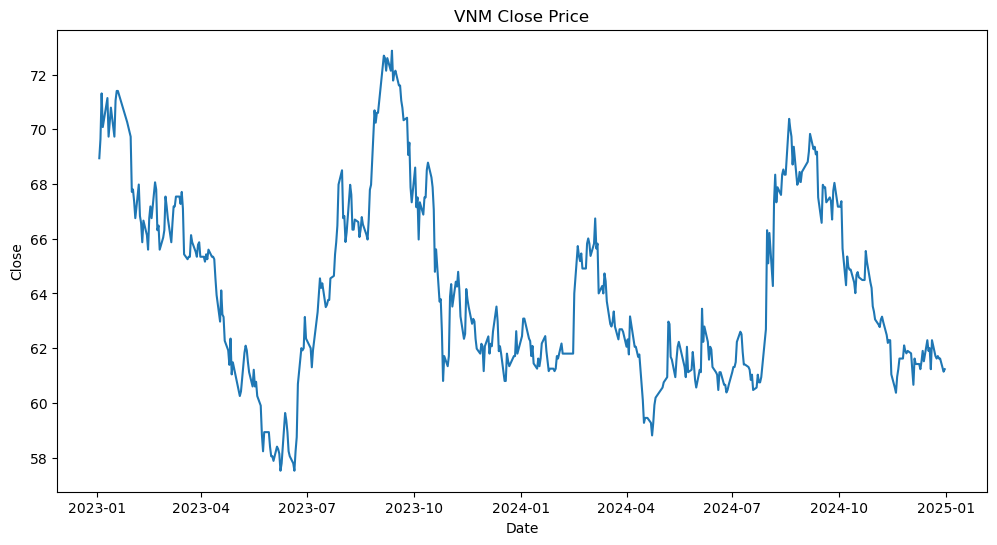

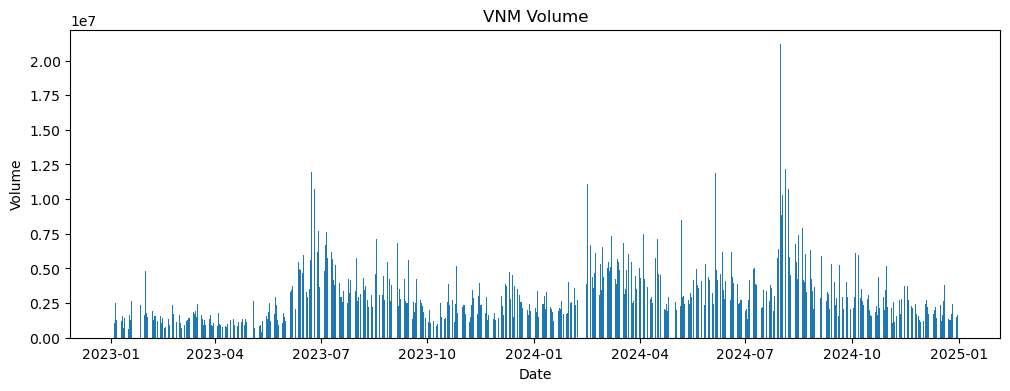

In [13]:
print(df_raw.info())
print(df_raw.describe())
print("Missing values:\n", df_raw.isnull().sum())

plt.figure(figsize=(12,6))
plt.plot(df_raw['time'], df_raw['close'])
plt.title(f"{ticker} Close Price")
plt.xlabel("Date"); plt.ylabel("Close")
plt.show()

plt.figure(figsize=(12,4))
plt.bar(df_raw['time'], df_raw['volume'])
plt.title(f"{ticker} Volume")
plt.xlabel("Date"); plt.ylabel("Volume")
plt.show()


In [18]:
from pathlib import Path
import pandas as pd

def find_repo_root(start: Path = Path.cwd()):
    p = start.resolve()
    # Tìm thư mục chứa đồng thời 'data', 'envs', 'agents'
    while p != p.parent:
        if (p/"data").is_dir() and (p/"envs").is_dir() and (p/"agents").is_dir():
            return p
        p = p.parent
    raise FileNotFoundError("Không tìm thấy repo root có các thư mục data/envs/agents.")

repo_root = find_repo_root()
raw_dir = repo_root / "data" / "raw"
assert raw_dir.is_dir(), f"Thiếu thư mục {raw_dir}; hãy tạo trong repo trước."

# Chuẩn hoá & lưu (giống ở trên)
rename_map = {
    "Time":"time", "date":"time",
    "Symbol":"tic", "ticker":"tic", "symbol":"tic",
    "Open":"open", "High":"high", "Low":"low", "Close":"close",
    "Volume":"volume"
}
df_raw = df_raw.rename(columns={k:v for k,v in rename_map.items() if k in df_raw.columns})
if "tic" not in df_raw.columns: df_raw["tic"] = "VNM"
df_raw["time"] = pd.to_datetime(df_raw["time"])
df_raw = df_raw[["time","tic","open","high","low","close","volume"]].sort_values(["tic","time"]).drop_duplicates()

symbol = df_raw["tic"].iloc[0]
start  = df_raw["time"].min().date()
end    = df_raw["time"].max().date()
out_path = raw_dir / f"{symbol}_raw_{start}_to_{end}.csv"
df_raw.to_csv(out_path, index=False)
out_path


WindowsPath('D:/NCKH/SARSA-FinancialRL/data/raw/VNM_raw_2023-01-03_to_2024-12-31.csv')